In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danish00","key":"ca63a4455b589eb3e10a5aa576f76609"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 1.21GB/s]


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['V1']

,V1
0,-1.359807
1,1.191857
2,-1.358354
3,-0.966272
4,-1.158233
...,...
284802,-11.881118
284803,-0.732789
284804,1.919565
284805,-0.240440


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
One_val = df.where(df['Class'] == 1)

In [ ]:
zero_val = df.where(df['Class'] == 0)

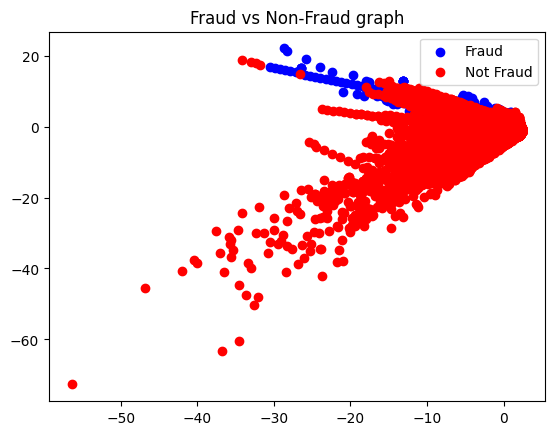

In [ ]:
plt.scatter(One_val['V1'] , One_val['V2'] , c = "blue" , label = "Fraud")
plt.scatter(zero_val['V1'] , zero_val['V2'] , c = "red" , label = "Not Fraud")
plt.legend()
plt.title("Fraud vs Non-Fraud graph")
plt.show()

In [ ]:
df['Amount'].value_counts()

,count
Amount,
-0.349231,13688
-0.345313,6044
-0.349671,4872
-0.313289,4747
-0.293258,3280
...,...
0.455344,1
0.657687,1
2.107673,1


In [ ]:
df[['Class' , 'Amount' , 'Time']]

,Class,Amount,Time
0,0,0.244964,-1.996583
1,0,-0.342475,-1.996583
2,0,1.160686,-1.996562
3,0,0.140534,-1.996562
4,0,-0.073403,-1.996541
...,...,...,...
284802,0,-0.350151,1.641931
284803,0,-0.254117,1.641952
284804,0,-0.081839,1.641974
284805,0,-0.313249,1.641974


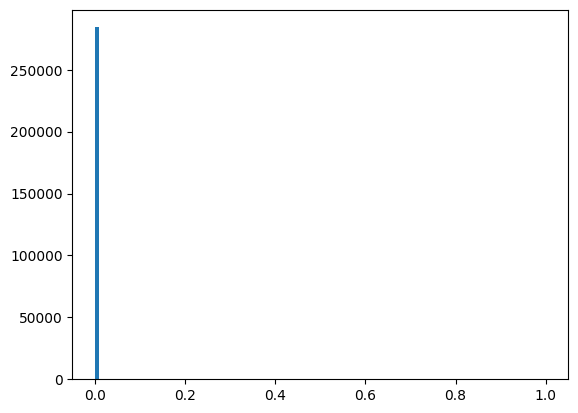

In [ ]:
plt.hist(df['Class'] , bins = 100)
plt.show()

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df[['Time' , 'Amount']] = scaler.fit_transform(df[['Time' , 'Amount']])

In [ ]:
df[['Time' , 'Amount']]

,Time,Amount
0,-1.996583,0.244964
1,-1.996583,-0.342475
2,-1.996562,1.160686
3,-1.996562,0.140534
4,-1.996541,-0.073403
...,...,...
284802,1.641931,-0.350151
284803,1.641952,-0.254117
284804,1.641974,-0.081839
284805,1.641974,-0.313249


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
X = df.drop('Class' , axis = 1)
Y = df['Class']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train , X_Test , Y_Train , Y_Test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [ ]:
X_Train.shape

(227845, 30)

In [ ]:
Y_Train.shape

(227845,)

In [ ]:
smote = SMOTE(sampling_strategy='auto' , random_state=42)

In [ ]:
X_Train_smote , Y_Train_smote = smote.fit_resample(X_Train , Y_Train)

In [ ]:
X_Train_smote.shape

(454902, 30)

In [ ]:
Y_Train_smote.value_counts()/Y_Train_smote.shape[0]

# df['Class'].value_counts()/df.shape[0]

,count
Class,
0,0.5
1,0.5


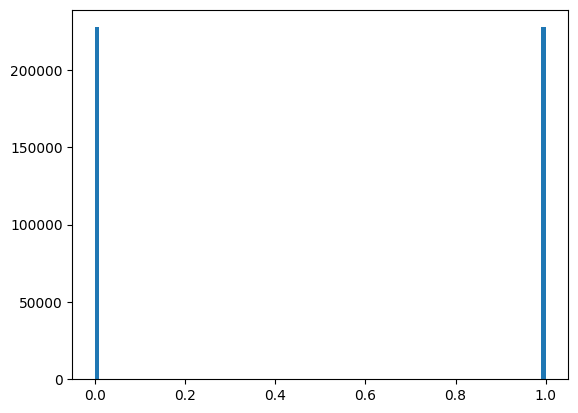

In [ ]:
# plt.figure(figsize=(10,10))
plt.hist(Y_Train_smote , bins = 100)
plt.show()

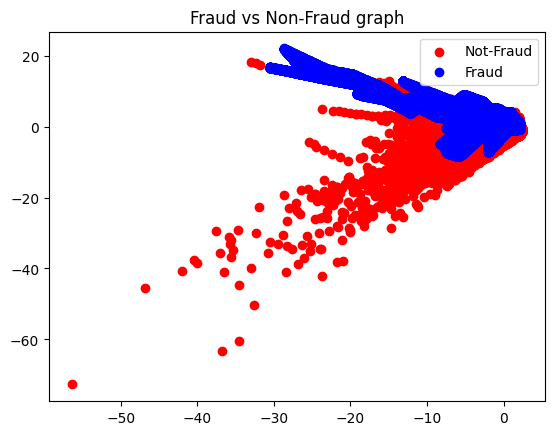

In [ ]:
plt.scatter(X_Train_smote[Y_Train_smote == 0]['V1'] , X_Train_smote[Y_Train_smote == 0]['V2'] , c = "red" , label = "Not-Fraud")
plt.scatter(X_Train_smote[Y_Train_smote == 1]['V1'] , X_Train_smote[Y_Train_smote == 1]['V2'] , c = "blue" , label = "Fraud")
plt.legend()
plt.title("Fraud vs Non-Fraud graph")
plt.show()

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:


model = Sequential([
    Dense(16, activation='relu', input_dim=30, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 48 (192.00 B)

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


history = model.fit(X_Train_smote, Y_Train_smote, epochs=10, batch_size=64,
                   validation_data=(X_Test, Y_Test), callbacks=[early_stopping])



Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9246 - loss: 0.2698 - val_accuracy: 0.9905 - val_loss: 0.0416
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9652 - loss: 0.1042 - val_accuracy: 0.9922 - val_loss: 0.0371
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9663 - loss: 0.1014 - val_accuracy: 0.9925 - val_loss: 0.0356
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9666 - loss: 0.0999 - val_accuracy: 0.9895 - val_loss: 0.0415
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9675 - loss: 0.0998 - val_accuracy: 0.9912 - val_loss: 0.0379
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9688 - loss: 0.0961 - val_accuracy: 0.9871 - val_loss: 0.0455
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9690 - loss: 0.0965 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9688 - loss: 0

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.92      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.96      0.65     56962
weighted avg       1.00      0.99      1.00     56962

ROC-AUC: 0.9800116532966591


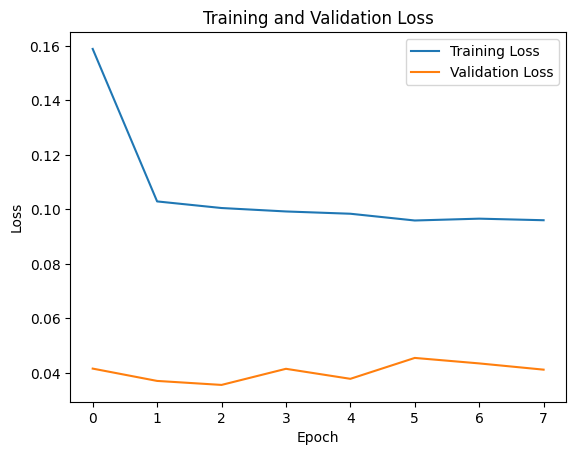

In [ ]:
y_pred_proba = model.predict(X_Test)
y_pred = (y_pred_proba > 0.5).astype(int)
print(classification_report(Y_Test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_Test, y_pred_proba))

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_Test, y_pred_proba)
optimal_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]
y_pred_adjusted = (y_pred_proba > optimal_threshold).astype(int)
print(classification_report(Y_Test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.76      0.81        98

    accuracy                           1.00     56962
   macro avg       0.94      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962

